# IMAGE ENHANCEMENT

It is the process of image manipulation to make it more suitable for specific use. 
It provides better contrast and a more detailed image and is used to enhance medical images, images captured in remote sensing, images from satellite etc.

### Image Enhancement can be done in:

- ### Spatial Domain: 
There is a direct manipulation of a pixel in an image (on the image plane)

![img01](https://www.tutorialspoint.com/dip/images/frequencydomain1.jpg)

- ### Frequency Domain: 
Processing the image is based on modifying the Fourier transform of an image.

![img02](https://www.tutorialspoint.com/dip/images/frequencydomain2.jpg)

## Why is it done?

It is done for the following reasons:
- Highlighting interesting detail in images.
- Removing noise from images.
- Making images more visually appealing.

The transformation function is given as follows:

**S = T(r)**

Where,
r is the pixels of the input image.
s is the pixels of the output image.
T is a transformation function that maps each value to r to each value of s.

It can be achieved through grey level transformations.


## BASIC GREY LEVEL TRANSFORMATIONS

### IMAGE NEGATIVES:

It reverses the grey level order.
Let the image has an intensity level in the range **[0 L-1]**, then the intensity
transformation is given by 

**s=L-1-r**

In [3]:
# Importing Modules
import cv2
import matplotlib.pyplot as plt
import numpy as np

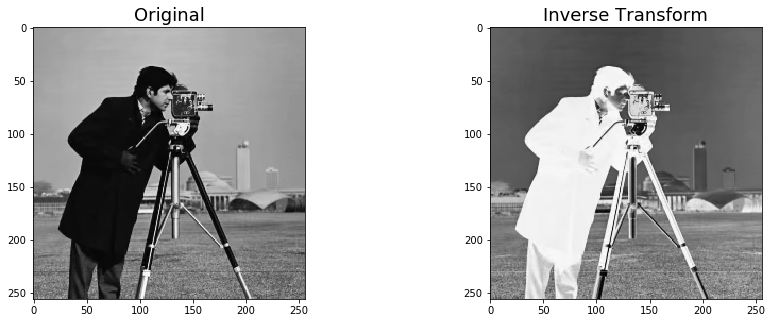

In [4]:
im = cv2.imread('cameraman.png',0)
im_inverse = 255 - im
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(121)
plt.title('Original',fontsize=18)
plt.imshow(im,cmap='gray')

ax = fig.add_subplot(122)
plt.imshow(im_inverse,cmap='gray')
ax.set_title('Inverse Transform',fontsize=18)
plt.show()

### LOG TRANSFORMATIONS:

For an image having intensity ranging from **[0 L-1]**, log transformation is given by

**s=c log(1+r)** 
where c is a constant.

It compresses the dynamic range of images with a large variation in the pixel value.

**Properties**:

- For lower amplitudes of input image the range of grey levels is expanded.
- For higher amplitudes of an input image, the range of grey levels is compressed.

**Log transform on Fourier Spectrum**

![imgt4](https://github.com/ninjakx/ninjakx.github.io/raw/master/assets/img/posts/logtransform.PNG)

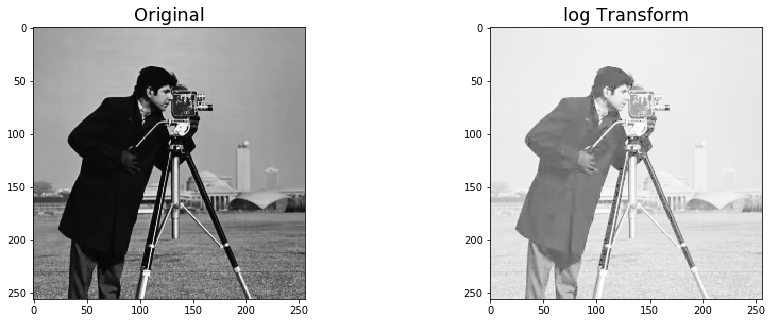

In [6]:
im_log_law_transformation = 0.6 * (np.log(1 + np.float32(im)))

fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(121)
plt.title('Original',fontsize=18)
plt.imshow(im,cmap='gray')

ax = fig.add_subplot(122)
plt.imshow(im_log_law_transformation,cmap='gray')
ax.set_title('log Transform',fontsize=18)
plt.show()

### POWER-LAW TRANSFORMATIONS:

There are further two transformation is power law transformations, that include nth power and nth root transformation.
The expression for power-law transformation is given as:

![img1](https://latex.codecogs.com/gif.latex?%5Cdpi%7B100%7D%20s%20%3D%20c*r%5E%5Cgamma)

where γ and c are real numbers.

This transformation is also known as gamma transformation.
This type of transformation is used for enhancing images for a different type of display devices. 
The gamma of different display devices is different. 
For example, Gamma of CRT lies in between of 1.8 to 2.5, that means the image displayed on CRT is dark.

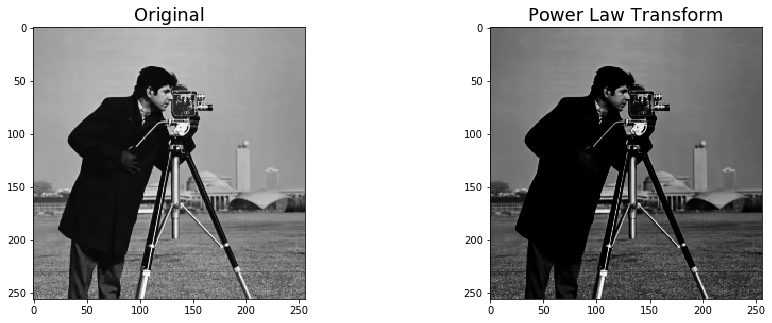

In [7]:
im1 = im/255.0
im_power_law_transformation = cv2.pow(im1,1.8)

fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(121)
plt.title('Original',fontsize=18)
plt.imshow(im,cmap='gray')

ax = fig.add_subplot(122)
plt.imshow(im_power_law_transformation,cmap='gray')
ax.set_title('Power Law Transform',fontsize=18)
plt.show()

### PIECEWISE TRANSFORMATIONS

**1) CONTRAST STRETCHING**

It is to increase the dynamic range of the grey levels in the image being processed.
It produces higher contrast than the original image by:
- Darkening the levels below m in the original image.
- Brightening the levels above m in the original image.

![img2](https://github.com/ninjakx/ninjakx.github.io/raw/master/assets/img/posts/contraststretch.PNG)

**2) GREY LEVEL SLICING AKA INTENSITY SLICING**

It highlights a specific range of grey levels in an image.
- 1st transformation brightens the desired range of grey levels but preserves grey levels unchanged.
- 2nd transformation displays a high value of all grey levels in the range of interest and a low value for all other grey levels.

![img3](https://github.com/ninjakx/ninjakx.github.io/raw/master/assets/img/posts/greylevel.PNG)

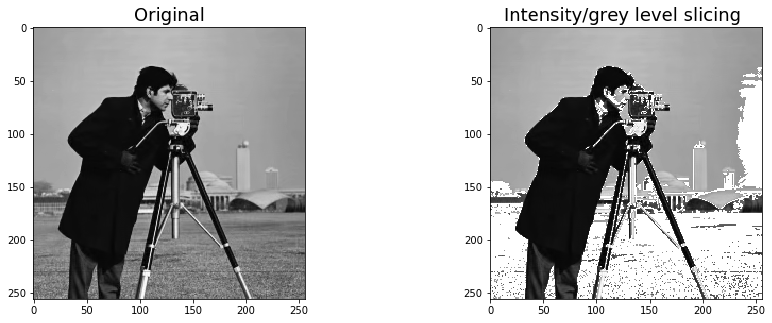

In [8]:
lower_limit = 100
upper_limit = 150
mask = cv2.inRange(im,lower_limit, upper_limit);
im_grey_scaling = im.copy()
im_grey_scaling[mask>0]=255

fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(121)
plt.title('Original',fontsize=18)
plt.imshow(im,cmap='gray')

ax = fig.add_subplot(122)
plt.imshow(im_grey_scaling, cmap='gray')
ax.set_title('Intensity/grey level slicing ',fontsize=18)

plt.show()

**3) BIT-PLANE SLICING**

Instead of highlighting gray level images, highlighting the contribution made to total image appearance by specific bits might be desired. Suppose that each pixel in an image is represented by 8 bits. 

![img4](https://player.slideplayer.com/24/7037092/data/images/img18.jpg)

Higher-order bits contain the majority of the visually significant data.

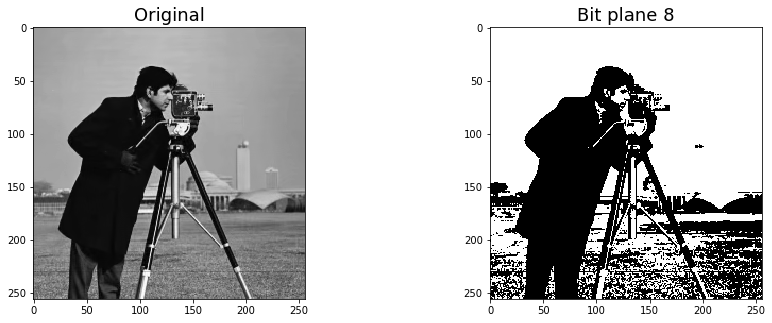

In [9]:
bit_plane = im.copy()
bit_plane_no = 8

for i in range(0, im.shape[0]):
    for j in range(0, im.shape[1]):
        bit_plane[i,j] = (im[i,j] & 2**(bit_plane_no-1))
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(121)
plt.title('Original',fontsize=18)
plt.imshow(im,cmap='gray')

ax = fig.add_subplot(122)
plt.imshow(bit_plane,cmap='gray')
ax.set_title('Bit plane '+str(bit_plane_no),fontsize=18)
plt.show()

### DISPLAYING ALL THE TRANSFORMATION RESULTS IN ONE WINDOW

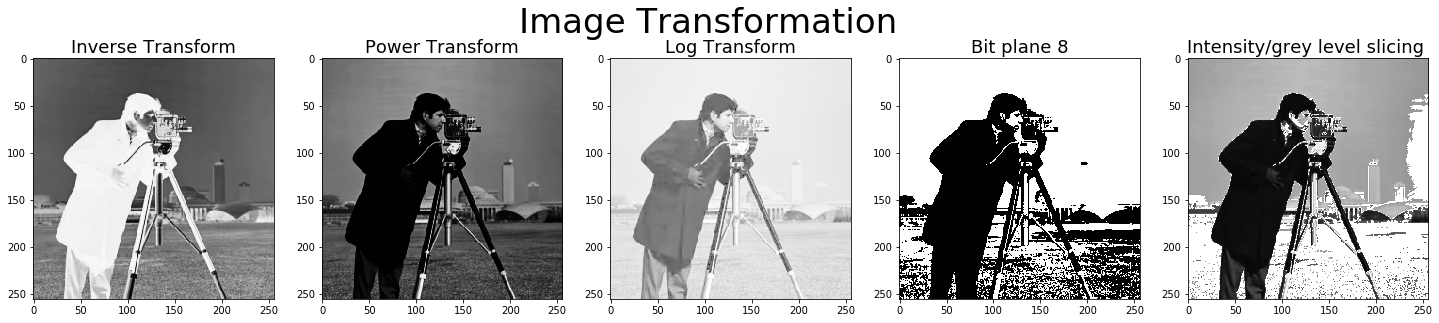

In [10]:
fig = plt.figure(figsize=(25,5))
fig.suptitle('Image Transformation',fontsize=34)
ax = fig.add_subplot(151)
plt.imshow(im_inverse,cmap='gray')
ax.set_title('Inverse Transform',fontsize=18)
ax = fig.add_subplot(152)
plt.imshow(im_power_law_transformation,cmap='gray')
ax.set_title('Power Transform',fontsize=18)
ax = fig.add_subplot(153)
plt.imshow(im_log_law_transformation,cmap='gray')
ax.set_title('Log Transform',fontsize=18)
ax = fig.add_subplot(154)
plt.imshow(bit_plane,cmap='gray')
ax.set_title('Bit plane '+str(bit_plane_no),fontsize=18)
ax = fig.add_subplot(155)
plt.imshow(im_grey_scaling, cmap='gray')
ax.set_title('Intensity/grey level slicing ',fontsize=18)
plt.show()

## REFERENCES:
- [Introduction to frequency domain](https://www.tutorialspoint.com/dip/introduction_to_frequency_domain.htm)
- [What is Image Enhancement](https://www.tutorialspoint.com/dip/gray_level_transformations.htm)
- [Why to use Image Enhancement](https://www.docsity.com/en/image-enhancement-computer-graphics-and-image-processing-lecture-slides/313803/)
- [Image Enhancement Techniques](http://universe.bits-pilani.ac.in/uploads/Image%20Enhancement%20in%20Spatial%20Domain.pdf)
- [Grey level transformations](https://slideplayer.com/slide/7037092/)